# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data to pd.dataframe
df = pd.read_csv('train.csv')

In [29]:
# Measures of Centrality and Dispersion for
desc = df.describe()
std_mean_ratio = desc.std()/desc.mean()
std_mean_ratio.sort_values(ascending=False)


chas       2.815888
nox        2.794334
dis        2.579703
rm         2.498359
rad        2.231839
indus      2.208814
crim       2.202847
lstat      2.127556
ptratio    2.023343
zn         1.925720
medv       1.833747
age        1.084212
ID         0.641785
black      0.532876
tax        0.525139
dtype: float64

# Dispersion Parameters
As a ratio of stdev to mean, the largest and smallest amounts of dispersion are <br>
Top 3: chas (2.81), nox (2.79), dis (2.58) <br>
Bottom 3: tax (0.52), black (0.53), ID (0.64) <br>


In [30]:
# Three Two-Way Splits of Data <br> 
#These parameter pairs were selected by seeing interseting relationships through scatter matrix plots

#NOx and Distance 
nox_dis =df.loc[:,['nox','dis']].copy()

#print(nox_dis.dis.std())
NOx_mean = nox_dis.nox.mean()
dis_mean = nox_dis.dis.mean()
NOx_std = nox_dis.nox.std()
dis_std = nox_dis.dis.std()
NOx_ratio = nox_dis.nox.std()/nox_dis.nox.mean()
dis_ratio = nox_dis.dis.std()/nox_dis.dis.mean()

print("The mean (centrality) of NOx was", "%.2f" %NOx_mean, "and the mean of distance to emloyment centers was ", 
      "%.2f." %dis_mean, "The standard deviation of NOx was", "%.2f" %NOx_std, "and the mean of distance to "
      "emloyment centers was", "%.2f." %dis_std, "Std as a perent of the mean was" , "%.2f" %NOx_ratio,
      "for NOx and" , "%.2f" %dis_ratio,"for distance.", "\n")

# Wealth and Age
medv_age =df.loc[:,['medv', 'age']].copy()

# Description of BuildingValue and Age
medv_mean = medv_age.medv.mean()*10000
age_mean = medv_age.age.mean()
medv_std = medv_age.medv.std()*10000
age_std = medv_age.age.std()
medv_ratio = medv_age.medv.std()/medv_age.medv.mean()
age_ratio = medv_age.age.std()/medv_age.age.mean()

print("The mean (centrality) of building value was", "$%.0f" %medv_mean, "and the mean fraction of buildings built before 1940 was ", 
      "%.2f." %age_mean, "The standard deviation of building value was", "$%.0f" %medv_std, "and the standard deviation of pre-1940 buildings"
      "was", "%.2f." %age_std, "Std as a perent of the mean was" , "%.2f" %medv_ratio,
      "for building value and" , "%.2f" %age_ratio,"for pre-1940 build fraction.", "\n")

# Black and Crime
blk_crim =df.loc[:,['black', 'crim']].copy()

# Description of Black and Crime
blk_mean = (blk_crim.black.mean()/1000)**0.5+0.63
crim_mean = blk_crim.crim.mean()
blk_med = (blk_crim.black.median()/1000)**0.5+0.63
crim_med = blk_crim.crim.median()
blk_std = (blk_crim.black.std()/1000)**0.5+0.63
crim_std = blk_crim.crim.std()
blk_ratio = blk_crim.black.std()/blk_crim.black.mean()
crim_ratio = blk_crim.crim.std()/blk_crim.crim.mean()

print("The mean (centrality) of black proportion in town was", "%.2f" %blk_mean, "and the mean crime rate was", 
      "%.2f." %crim_mean, "Versus median values for black proportion and crime of:", "%.2f," %blk_med, "%.2f" %crim_med,
      ", respectively.", "Note: crime is significantly skewed by high value groups, which increases the std", 
      "The standard deviation of black population portion was", "%.2f" %blk_std, "and the standard deviation of crime was", 
      "%.2f." %crim_std, "Std as a perent of the mean was" , "%.2f" %blk_ratio,
      "for black population fraction and", "%.2f" %crim_ratio,"for crime.")


The mean (centrality) of NOx was 0.56 and the mean of distance to emloyment centers was  3.71. The standard deviation of NOx was 0.11 and the mean of distance to emloyment centers was 1.98. Std as a perent of the mean was 0.21 for NOx and 0.53 for distance. 

The mean (centrality) of building value was $227688 and the mean fraction of buildings built before 1940 was  68.23. The standard deviation of building value was $91735 and the standard deviation of pre-1940 buildingswas 28.13. Std as a perent of the mean was 0.40 for building value and 0.41 for pre-1940 build fraction. 

The mean (centrality) of black proportion in town was 1.23 and the mean crime rate was 3.36. Versus median values for black proportion and crime of: 1.26, 0.26 , respectively. Note: crime is significantly skewed by high value groups, which increases the std The standard deviation of black population portion was 0.92 and the standard deviation of crime was 7.35. Std as a perent of the mean was 0.24 for black popul

In [46]:
# Plotting Default Settings
%matplotlib notebook
plt.style.use('ggplot')


<IPython.core.display.Javascript object>


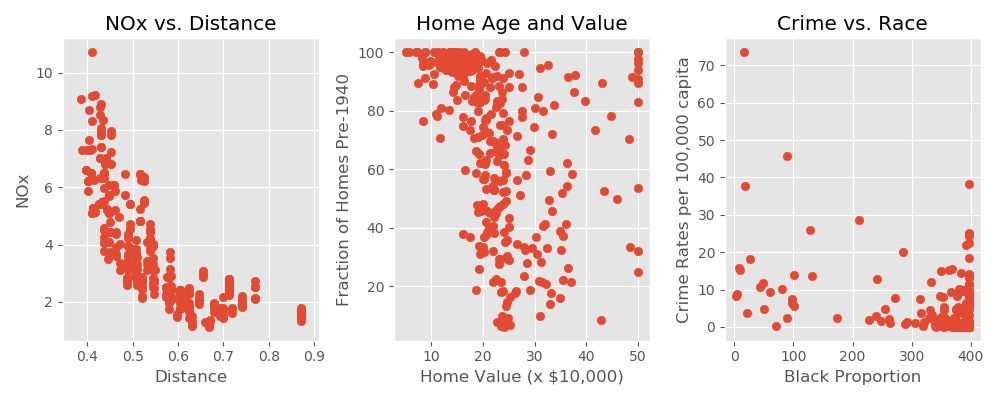

In [52]:
# Data Visualization with Subplots- Scatter
# datasets: nox_dis, medv_age, blk_crim

plot1 = plt.figure(figsize = (10,4))
ax1 = plot1.add_subplot(1,3,1)
ax2 = plot1.add_subplot(1,3,2)
ax3 = plot1.add_subplot(1,3,3)

ax1.scatter(nox_dis.nox,nox_dis.dis)
ax2.scatter(medv_age.medv,medv_age.age)
ax3.scatter(blk_crim.black,blk_crim.crim)

# Ax1 Labels
ax1.set_xlabel('Distance')
ax1.set_ylabel('NOx')
ax1.set_title('NOx vs. Distance')

# Ax2 Labels
ax2.set_xlabel('Home Value (x $10,000)')
ax2.set_ylabel('Fraction of Homes Pre-1940')
ax2.set_title('Home Age and Value')

# Ax3 Labels
ax3.set_xlabel('Black Proportion')
ax3.set_ylabel('Crime Rates per 100,000 capita')
ax3.set_title('Crime vs. Race')

plt.tight_layout()

<IPython.core.display.Javascript object>


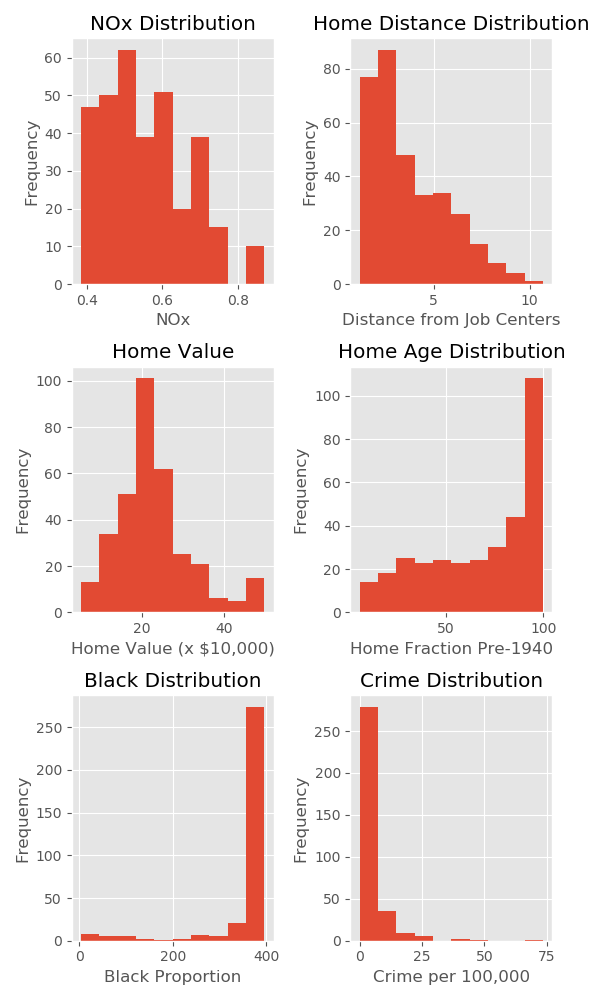

In [57]:
# Data Visualization with Subplots- Histogram
# datasets: nox_dis, medv_age, blk_crim

plot2 = plt.figure(figsize = (6,10))
ax12 = plot2.add_subplot(3,2,1)
ax22 = plot2.add_subplot(3,2,2)
ax32 = plot2.add_subplot(3,2,3)
ax42 = plot2.add_subplot(3,2,4)
ax52 = plot2.add_subplot(3,2,5)
ax62 = plot2.add_subplot(3,2,6)

ax12.hist(nox_dis.nox)
ax22.hist(nox_dis.dis)
ax32.hist(medv_age.medv)
ax42.hist(medv_age.age )
ax52.hist(blk_crim.black)
ax62.hist(blk_crim.crim)

# Ax1 Labels
ax12.set_xlabel('NOx')
ax12.set_ylabel('Frequency')
ax12.set_title('NOx Distribution')

# Ax2 Labels
ax22.set_xlabel('Distance from Job Centers')
ax22.set_ylabel('Frequency')
ax22.set_title('Home Distance Distribution')

# Ax3 Labels
ax32.set_xlabel('Home Value (x $10,000)')
ax32.set_ylabel('Frequency')
ax32.set_title('Home Value')

# Ax4 Labels
ax42.set_xlabel('Home Fraction Pre-1940')
ax42.set_ylabel('Frequency')
ax42.set_title('Home Age Distribution')

# Ax5 Labels
ax52.set_xlabel('Black Proportion')
ax52.set_ylabel('Frequency')
ax52.set_title('Black Distribution')

# Ax6 Labels
ax62.set_xlabel('Crime per 100,000')
ax62.set_ylabel('Frequency')
ax62.set_title('Crime Distribution')

plt.tight_layout()

<IPython.core.display.Javascript object>


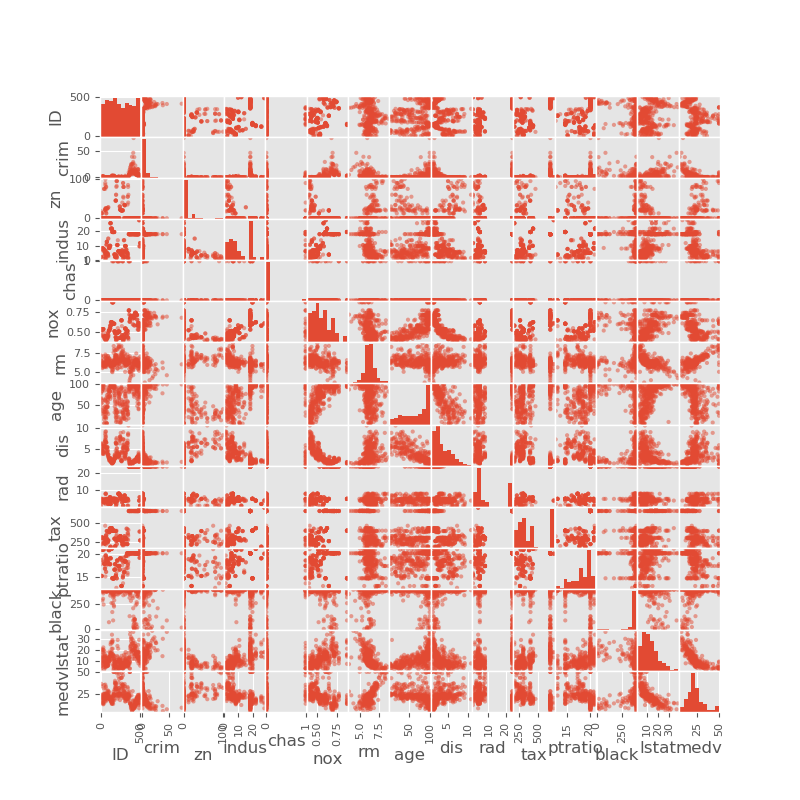

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273A4A319E8>,
      dtype=object)

In [49]:
pd.plotting.scatter_matrix(df, figsize =(8,8))

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!